# Exploration code for the data challenge
## Stefano Cosentino

In [8]:
import csv
import numpy as np
import pandas as pd

import pylab
from matplotlib import pyplot as plt
%matplotlib inline

# Import custom modules
from dataprep.parse_input import *



In [9]:
filename='/Users/joeDiHare/Documents/dataprep/dataprep/data/link.csv'
df = pd.read_csv(filename)
df.head()
# with open(filename, newline='') as csvfile:
#     subjID = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in subjID:
#         print(', '.join(row))

# lstFilesDCM = []  # create an empty list
# for dirName, subdirList, fileList in os.walk(PathDicom):
#     for filename in fileList:
#         if filename.endswith('.dcm'):  # check whether the file's DICOM
#             lstFilesDCM.append(os.path.join(dirName, filename))


patient_id original_id
0  SCD0000101   SC-HF-I-1
1  SCD0000201   SC-HF-I-2
2  SCD0000301   SC-HF-I-4
3  SCD0000401   SC-HF-I-5
4  SCD0000501   SC-HF-I-6

In [10]:
filetxt='/Users/joeDiHare/Documents/dataprep/dataprep/data/contourfiles/'+df.original_id[0]+'/i-contours/IM-0001-0048-icontour-manual.txt'
with open(filetxt, newline='') as csvfile:
    subjID = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in subjID:
#         print(', '.join(row))

In [11]:
filedicom = '/Users/joeDiHare/Documents/dataprep/dataprep/data/dicoms/'+df.patient_id[0]+'/48.dcm'
import dicom as dicom
# read the file
ds = dicom.read_file(filedicom)
# store the raw image data
dicom_img = ds.pixel_array


In [27]:
np.max(y)

350.00012800000002

(0.0, 350.00012800000002)

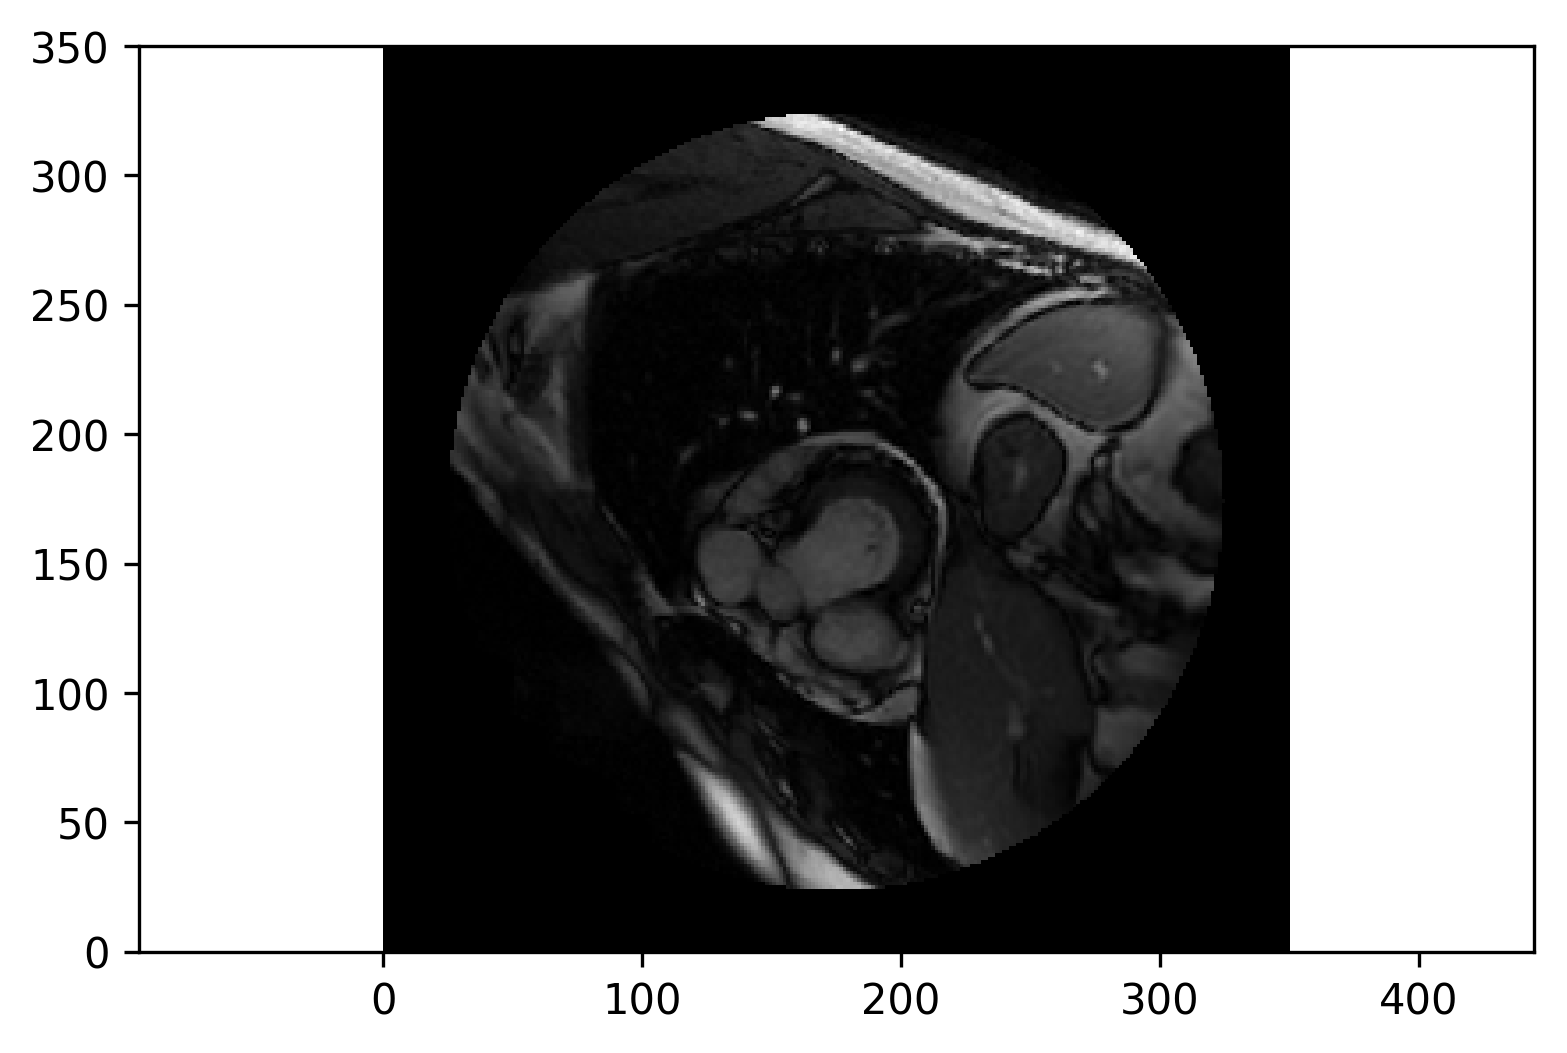

In [28]:
ConstPixelDims = (int(ds.Rows), int(ds.Columns), 1)

# Load spacing values (in mm)
ConstPixelSpacing = (float(ds.PixelSpacing[0]), float(ds.PixelSpacing[1]), float(ds.SliceThickness))

# calculate axes for this array
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(dicom_img))
plt.ylim([np.min(y), np.max(y)])
plt.xlim([np.min(x), np.max(x)])
# plt.plot(dicom_img)

In [30]:
coord = parse_contour_file(filetxt)
img = parse_dicom_file(filedicom)


In [31]:
poly_to_mask(coord, 350, 350)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)